# Probability

## Warmup: Count to 50

Use a RNG to generate rolls of a 12-sided die. 
Write a function that counts the number of rolls taken until the total of the rolls totals 50 or more.

```
rollto50() -> 5
rollto50() -> 6
```

In [21]:
# warmup
import numpy as np 
import random

rolls = np.random.randint(1,12,50)

totalSum=0
for i in range(0,len(rolls)):
    if totalSum>=50:
        print(f' {i+1} dice rolls were required to make the sum of 50')
        break
    totalSum+=rolls[i]



    


 9 dice rolls were required to make the sum of 50


## Exercise 1: Monte Carlo Sampling

Data Scientists are often lazy. Instead of calculating the exact probability of complex events, we simulate samples with a RNG and average the results. This is called **Monte Carlo Sampling** after the casino in Monaco (yes, really).

Write a function `monte_carlo_dice(n)` that given a 6-sided die, rolls it $n$ times and averages the result.

The result should get closer to the true expected value (3.5) as $n$ increases:

```
n: 100 Trial average 3.39 
n: 1000 Trial average 3.576 
n: 10000 Trial average 3.5054 
n: 100000 Trial average 3.50201 
n: 500000 Trial average 3.495568
```

In [38]:
# exercise 1
def monte_carlo_dice(n):
    
    rolls = np.random.randint(1,6,n)
    average = sum(rolls)/n
    
    return average

for n in range(100, 500000, 10000):
    print(f'n: {n} Trial average {monte_carlo_dice(n)}')


n: 100 Trial average 3.14
n: 10100 Trial average 3.008019801980198
n: 20100 Trial average 2.995671641791045
n: 30100 Trial average 3.0088372093023255
n: 40100 Trial average 2.9961596009975064
n: 50100 Trial average 2.9887425149700597
n: 60100 Trial average 3.008186356073211
n: 70100 Trial average 2.998188302425107
n: 80100 Trial average 2.994868913857678
n: 90100 Trial average 2.994106548279689
n: 100100 Trial average 2.995974025974026
n: 110100 Trial average 3.0046866485013624
n: 120100 Trial average 3.001948376353039
n: 130100 Trial average 3.0018524212144504
n: 140100 Trial average 3.0016059957173447
n: 150100 Trial average 2.99618254497002
n: 160100 Trial average 2.9969706433479075
n: 170100 Trial average 2.9961728395061726
n: 180100 Trial average 3.0032426429761245
n: 190100 Trial average 3.005344555497107
n: 200100 Trial average 3.00592203898051
n: 210100 Trial average 3.0041266063779153
n: 220100 Trial average 2.9962153566560654
n: 230100 Trial average 3.0026770969143852
n: 2401

## Exercise 2: Estimating the Area of a Circle

Consider a dartboard with a circle of radius $r$ inscribed in a square with side $2r$. Now let’s say you start throwing a large number of darts at it. 

Some of these will hit the board within the circle—let’s say, $N$—and others out-side it—let’s say, $M$. If we consider the fraction of darts that land inside the circle:

$$f = \dfrac{N}{N + M}$$

Then the value of $f * A$ with $A$ being the area of the square will approximate the actual area of the circle (which is  $\pi r^2$)

<img src="../assets/circle-target.png" style="width: 400px;">

Write a function `circle_estimate(radius, trials)` which will estimate the area of a circle by throwing `trials` random darts at the square.



```
Radius: 2
Area: 12.566370614359172, Estimated (1000 darts): 12.576
Area: 12.566370614359172, Estimated (100000 darts): 12.58176
Area: 12.566370614359172, Estimated (1000000 darts): 12.560128
```

**Hint:** Generate 2 random numbers for each dart throw, one for the `x` axis and one for the `y` axis. Use the [Pythagorean Theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem) find if it's outside the circle

In [118]:
# Exercise 2 
import math
import numpy as np



def circle_estimate(radius, trials):
    N = 0 #Successes
    M = 0 #Misses
    A = (2*radius)**2  # Area of the SQUARE
    F = 0 # Shot sucess rate
    circleAreaEstimate = 0
    
    #The coordinates are taken from the circle center
    
    #USE if radius <= 5 ( sampling with floats is a more logical evaluation than integers between [0,2])
    trials_x = np.random.random(size=trials)*radius #generates float between [0.0,radius]
    trials_y = np.random.random(size=trials)*radius #generates float between [0.0,radius]
    
    #USE if radius >= 5
    #trials_x = np.random.randint(0,radius, trials) #generates ints array of 'trials' amount of items between [0,radius]
    #trials_y = np.random.randint(0,radius, trials) #generates ints array of 'trials' amount of items between [0,radius]
    
    #If a dart is within the cercle: hypotenus(x,y)<= radius
    #If a dart is outside the cercle: hypotenus(x,y)>= radius
    for i,j in zip(trials_x, trials_y):
        hypotenus_x_y = math.sqrt(i**2 + j**2)
        if hypotenus_x_y<=radius: #Shot within cercle if hyp(x,y) <= radius
            N+=1 #success
        else:
            M+=1 #misses
    F = N/(N+M)
    
    print(f'N = {N}' )
    print(f'M = {M}' )
    print(f'F = {F}' )
    print(f'A = {A}' )
    
    circleAreaEstimate = F*A
    
    return circleAreaEstimate
    
            
            
#TEST
radius = 2
trials = 1000000
circle_estimate(radius, trials)





N = 785856
M = 214144
F = 0.785856
A = 16


12.573696

## Exercise 3: Binomial distribution

The [binomial random variable](https://en.wikipedia.org/wiki/Binomial_distribution) $ Y \sim Bin(n, p) $ represents the number of successes in $ n $ coin flips, where each trial succeeds with probability $ p $.

Without any import besides `from numpy.random import uniform`, write a function
`binomial_rv` such that `binomial_rv(n, p)` generates one draw of $ Y $.

Hint: If $ U $ is uniform on $ (0, 1) $ and $ p \in (0,1) $, then the expression `U < p` evaluates to `True` with probability $ p $.

 SUM of the cumulated probability is SUM(p)=0.9999999999999896
 with p =0.8
 with n =20


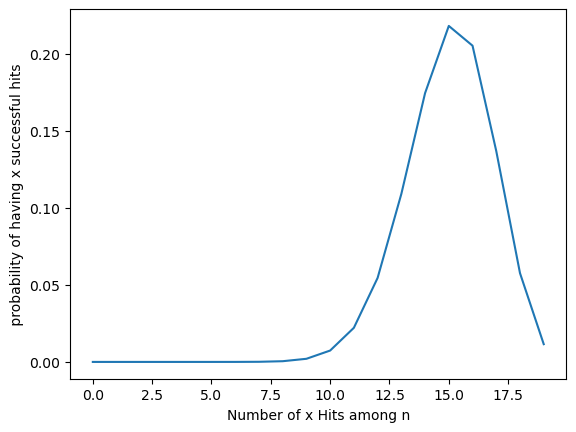

In [222]:
# exercise 3
from numpy.random import uniform
import matplotlib.pyplot as plt
import pandas as pd

# UNIFORM DISTRIBUTION: each outcome in the sample space is equally likely to occur
# p: probability of an event to occur
# n: number of trials in one batch
# x: number of successful occurrences among n trials


def binomial_rv(n,p):

    
    # Bin(n,p) = f(x,n,p) = (n x) . p^x . (1-p)^(n-x)
    #  =>  with Binomial Coefficient binCoef: (n x) = n!/(x!.(n-x)!)
    #  =>  with secMember :  p^x . (1-p)^(n-x)
    
    def binCoef (n,x):
        bincoef = math.factorial(n)/(math.factorial(x) * math.factorial(n-x))
        #print(f' bincoef = {bincoef}')
        return bincoef
    
    def secMember(p,n,x):
        secmem = (p**x)*(1-p)**(n-x)
        #print(f' secMem = {secmem}')
        return secmem
    
    
    #r = binCoef * secMember
    
    # X: is the probability of having x successful events among N trials
    X_axis_successOccurence = [x for x in range (0,n)]
    Y_axis_chances = [binCoef(n,x)*secMember(p,n,x) for x in range(1,n+1)]
    
    
    return X_axis_successOccurence,Y_axis_chances


p = 0.8  #<=1
n = 20

x_axis, y_axis = binomial_rv(n,p)


plt.ylabel(" probability of having x successful hits ")
plt.xlabel("Number of x Hits among n")
plt.plot( x_axis, y_axis)

print(f' SUM of the cumulated probability is SUM(p)={sum(y_axis)}')
print(f' with p ={p}')
print(f' with n ={n}')

# !!! The graph should be a histogramme rather than a curve